In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mcdonalds1.csv')

In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [7]:
df[df.columns[:11]] = df[df.columns[:11]].replace({'Yes':1,'No':0})

In [8]:
round(df.mean(),2)

yummy          0.55
convenient     0.91
spicy          0.09
fattening      0.87
greasy         0.53
fast           0.90
cheap          0.60
tasty          0.64
expensive      0.36
healthy        0.20
disgusting     0.24
Age           44.60
dtype: float64

### Perfroming PCA analysis

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)

In [10]:
ordinal_df = df[df.columns[:11]]

In [11]:
pca.fit(ordinal_df)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(ordinal_df)

In [13]:
pca_columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
df_pric = pd.DataFrame(x_pca,columns =pca_columns)

In [14]:
df_pric.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


##### Table1

In [15]:
standard_deviation = df_pric.std().to_list()
standard_deviation = [round(x,4) for x in standard_deviation]
# standard_deviation

In [16]:
proportion_of_variance = pca.explained_variance_ratio_.tolist()
proportion_of_variance = [round(x,4) for x in proportion_of_variance]
# proportion_of_variance

In [17]:
cumulative_proportion = [sum(proportion_of_variance[:i+1]) for i in range(len(proportion_of_variance))]
cumulative_proportion = [round(x,4) for x in cumulative_proportion]
# cumulative_proportion

In [18]:
df_pca_details = pd.DataFrame([standard_deviation,proportion_of_variance,cumulative_proportion], columns =pca_columns,
                             index = ['standard_deviation','proportion_of_variance','cumulative_proportion'])

In [19]:
df_pca_details

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
standard_deviation,0.7570,0.6075,0.5046,0.3988,0.3374,0.3103,0.2897,0.2751,0.2653,0.2488,0.2369
proportion_of_variance,0.2994,0.1928,0.1330,0.0831,0.0595,0.0503,0.0438,0.0395,0.0368,0.0324,0.0293
cumulative_proportion,0.2994,0.4922,0.6252,0.7083,0.7678,0.8181,0.8619,0.9014,0.9382,0.9706,0.9999


##### table2

In [20]:
#creating PC table for plotting scatterplot
df_comp = pd.DataFrame(pca.components_.T,index = ordinal_df.columns,columns = pca_columns)
df_comp = -1 *round(df_comp,3)
df_comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


#### Figure A.1

Text(0.5, 1.0, 'recreating figure: A.1')

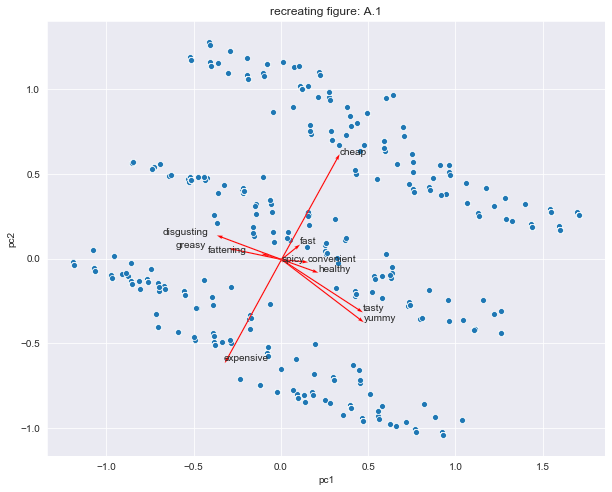

In [21]:
plt.figure(figsize = (10,8))
# for plotting scatterplot

sns.scatterplot(df_pric['pc1'],df_pric['pc2'])

X ,Y = 0,0  #initial coordinates
# for plotting vectors we use quiver plots

for i in range(11):
    plt.quiver(X, Y, df_comp['pc1'][i], df_comp['pc2'][i], color='r',units = 'xy',width = 0.007,scale =1,lw =-0.1)

    #  for displaying text

    if df_comp['pc1'][i]<0 and df_comp['pc2'][i]>0:
        plt.text(df_comp['pc1'][i]-0.3,df_comp['pc2'][i],df_comp.index[i])
    else:
        plt.text(df_comp['pc1'][i],df_comp['pc2'][i],df_comp.index[i])
plt.title('recreating figure: A.1')

## Step5 -  Extracting Segments

### K-means

In [22]:
from sklearn.cluster import KMeans

##### Figure A.2

Text(0.5, 0, 'no.of clusters')

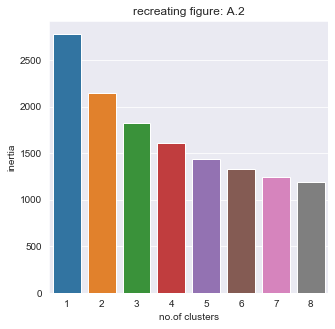

In [23]:
from sklearn.cluster import KMeans

count=list(range(1,9)) # no.of clusters
distance=list([0]*8) #cost for each cluster
for x in count:
    kmeans=KMeans(n_clusters=x).fit(ordinal_df)
    #inertia gives the sum of distance between each points wrt their cluster centers
    # this is also called elbow method to determine no of clusters to use
    distance[x-1]=kmeans.inertia_
plt.figure(figsize=(5,5))
sns.barplot(y = distance,x = list(range(1,9)))
plt.title('recreating figure: A.2')
plt.ylabel('inertia')
plt.xlabel('no.of clusters')

#### bootstrap sampling for kmeans for figure A.3

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
bootstraps = 100
my_scores = [] #size = n_bootstraps*n_cluster_range(100*8)
#for loop for running n bootstraps
for k in range(bootstraps):
    if k%10 == 0:
        print(k)
        
    #creating bootstrap samples(sample with replacement) of original size
    x_boot = ordinal_df.sample(len(ordinal_df),replace = True)
    my_scores1 = [] #size = n_cluster_range *1 (8*1)
    
    #running for loop for number of clusters from 2 to 8 
    for i in range(2,9):
        kme = KMeans(n_clusters = i,n_init=10,random_state = np.random.randint(1,1000)).fit(x_boot)
        
        #my_labels are required to compare with each repetition to get adjusted rand score
        my_labels = kme.labels_
        score_per_cluster =[] # size = n_rep*1 (10*1)
        
        # for loop for each repetition for each cluster
        for j in range(10):
            km = KMeans(n_clusters = i,n_init =1,random_state = np.random.randint(1,1000)).fit(x_boot)
            
        # appending adjusted_rand_score for each repetion of each cluster (a total of 10 per cluster)
            score_per_cluster.append(adjusted_rand_score(km.labels_,my_labels))
            
        #appending mean of each cluster for each repetition (a total of 8 per loop(avg of 10 repetitions for each loop))
        my_scores1.append(np.mean(score_per_cluster))
        
    # appending 8 scores for each cluster(a total of 100 for each bootstrap)
    my_scores.append(my_scores1)
    

0
10
20
30
40
50
60
70
80
90


In [25]:
s = pd.DataFrame(my_scores,columns = [2,3,4,5,6,7,8])

#### Figure A.3

Text(0.5, 1.0, 'recreating figure A.3')

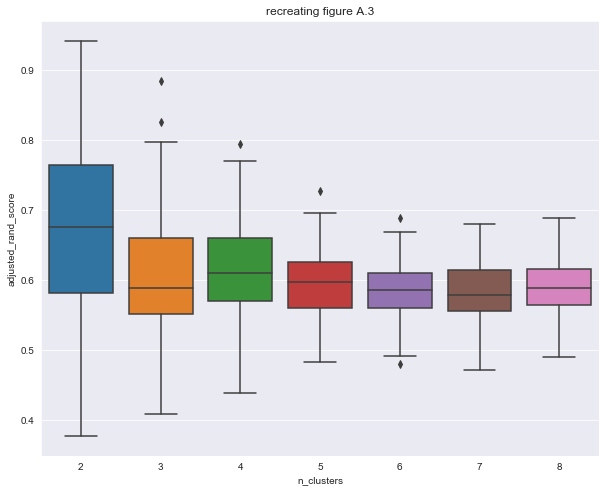

In [26]:
plt.figure(figsize =(10,8))
#boxplot for seaborn
sns.boxplot(data =s )

plt.xlabel('n_clusters')
plt.ylabel('adjusted_rand_score')
plt.title('recreating figure A.3')

#### Stability Plot for n = 4 clusters ,Figure A.4

In [27]:
# To check the stability of 4 clusters for 100 bootstraps

np.random.seed(1234)
rand_score = [] #size =n_bootstrap *1 (100*1)

for i in range(100):
    x_boot = ordinal_df.sample(len(ordinal_df),replace = True)
    
    #getting labels for n_clusters = 4 to compare with repetitions to get the average stability
    
    kme = KMeans(n_clusters = 4,n_init=10,max_iter = 3000, random_state = np.random.randint(1,1000)).fit(x_boot)
    my_labels = kme.labels_
    score_per_cluster =[] #size = 10*1
    
    for j in range(10):
        km = KMeans(n_clusters = 4,n_init =1,max_iter = 3000,random_state = np.random.randint(1,1000)).fit(x_boot)
        
        #getting rand_score for each repetition
        score_per_cluster.append(adjusted_rand_score(km.labels_,my_labels))
    
    rand_score.append(np.mean(score_per_cluster))

Text(0.5, 1.0, 'recreating figure: A.4')

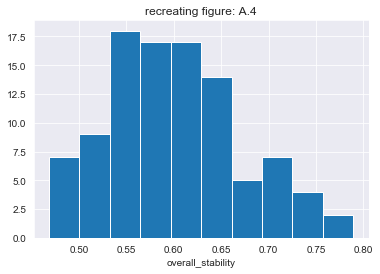

In [28]:
plt.hist(rand_score)
plt.xlabel('overall_stability')
plt.title('recreating figure: A.4')

## Step6- Profile Segmentation

In [29]:
ordinal_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [30]:
#final clustering to do profile segmentation and description
np.random.seed(1234)
final_segments = KMeans(n_clusters=4,max_iter = 3000)
final_segments.fit(ordinal_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#data with labels
cluster_data = df[df.columns[:11]]

In [32]:
cluster_data['labels'] =final_segments.labels_

In [33]:
cluster_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,labels
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1


#### Figure A.9

In [34]:
cluster0 = cluster_data[cluster_data['labels']==0]
cluster1 = cluster_data[cluster_data['labels']==1]
cluster2 = cluster_data[cluster_data['labels']==2]
cluster3 = cluster_data[cluster_data['labels']==3]

In [35]:
#Percentage of Yes for each column per each target segments

my_clusters = [cluster0,cluster1,cluster2,cluster3]
my_values = [] #size = (no of columns,no of clusters) (11*4)
for i in my_clusters:
    my_values1 = [] #size = (no of columns,1)
    for j in cluster3.columns[:-1]:
        #for column i no of rows with 'Yes' value in the cluster/total no of rows in that cluster
        my_values1.append(sum(i[j])/len(i))
        
    my_values.append(my_values1)
print(my_values)

[[0.9790874524714829, 0.9809885931558935, 0.0817490494296578, 0.7889733840304183, 0.35361216730038025, 0.9581749049429658, 0.9258555133079848, 0.973384030418251, 0.019011406844106463, 0.344106463878327, 0.04752851711026616], [0.01876675603217158, 0.9088471849865952, 0.08579088471849866, 0.9142091152815014, 0.5871313672922251, 0.9544235924932976, 0.8927613941018767, 0.3002680965147453, 0.013404825737265416, 0.07506702412868632, 0.32171581769436997], [0.02092050209205021, 0.6778242677824268, 0.07531380753138076, 0.9163179916317992, 0.7071129707112971, 0.7447698744769874, 0.06694560669456066, 0.0794979079497908, 0.899581589958159, 0.06276150627615062, 0.7280334728033473], [0.8761904761904762, 0.9587301587301588, 0.1365079365079365, 0.9047619047619048, 0.6063492063492063, 0.8571428571428571, 0.10793650793650794, 0.9301587301587302, 0.9206349206349206, 0.20634920634920634, 0.10793650793650794]]


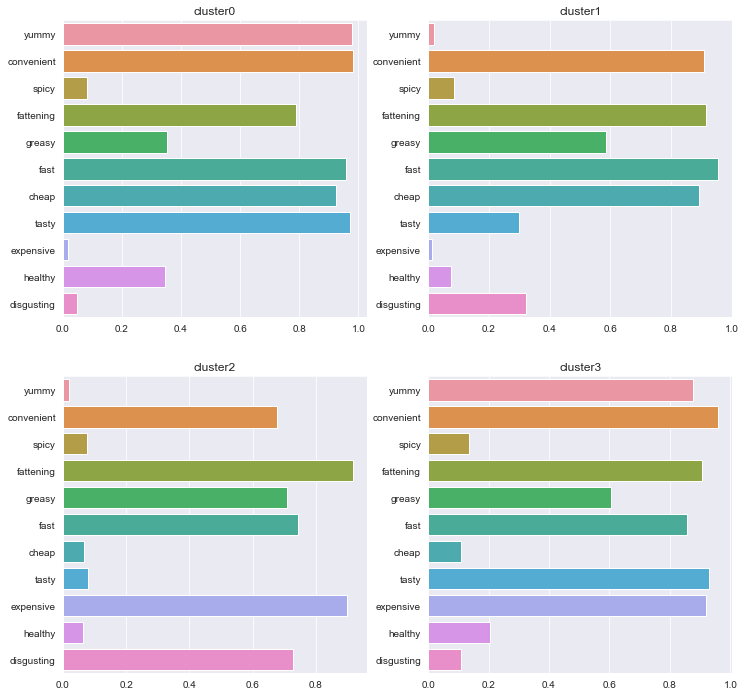

In [36]:
#Percentage of Yes vs columns for each cluster

fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.barplot(x = my_values[k],y = cluster3.columns[:-1],ax =axes[i,j])
        axes[i,j].set_title(f'cluster{k}')
        k+=1
# plt.title('recreating figure: A.9')

we can easily conclude some data like 

cluster0 and cluster3 found yummy and tasty

cluster 0 and cluster1 found cheap 

etc

#### Figure A.10

Text(0.5, 1.0, 'recreating figure :A10')

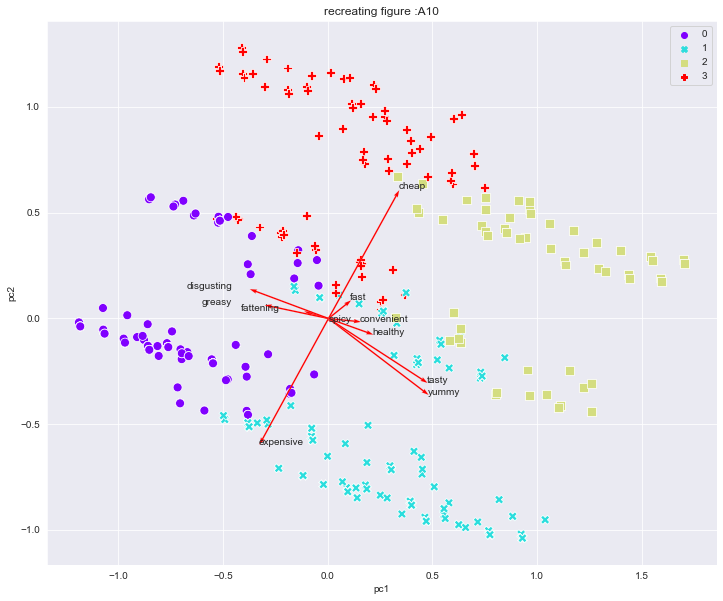

In [37]:
plt.figure(figsize = (12,10))
# plot of cluster segments
sns.scatterplot(df_pric['pc1'],df_pric['pc2'],style = final_segments.labels_,palette = 'rainbow',hue = final_segments.labels_,
               s=80)
X ,Y = 0,0
for i in range(11):
    plt.quiver(X, Y, df_comp['pc1'][i], df_comp['pc2'][i], color='r',units = 'xy',width = 0.007,scale =1,lw =-0.1)
    if df_comp['pc1'][i]<0 and df_comp['pc2'][i]>0:
        plt.text(df_comp['pc1'][i]-0.3,df_comp['pc2'][i],df_comp.index[i])
    else:
        plt.text(df_comp['pc1'][i],df_comp['pc2'][i],df_comp.index[i])
plt.title('recreating figure :A10')

### Some extra plots to fully understand fig A.9 for profile segmentation

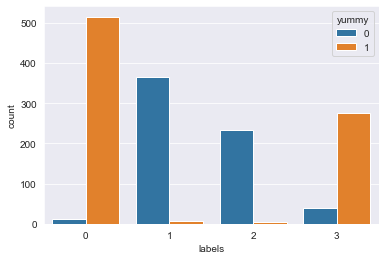

In [38]:
sns.countplot(cluster_data['labels'], hue = cluster_data['yummy'])

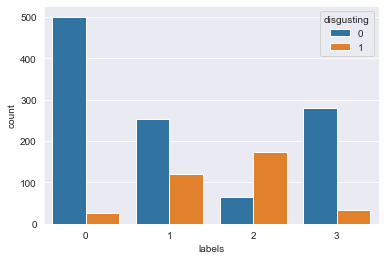

In [39]:
sns.countplot(cluster_data['labels'], hue = cluster_data['disgusting'])

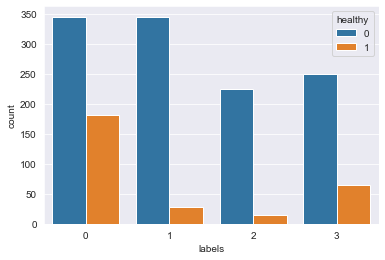

In [40]:
sns.countplot(cluster_data['labels'], hue = cluster_data['healthy'])

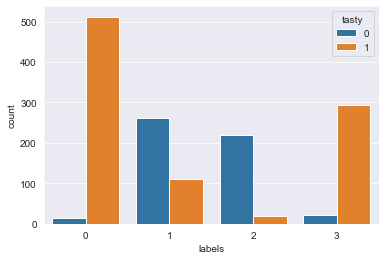

In [41]:
sns.countplot(cluster_data['labels'], hue = cluster_data['tasty'])

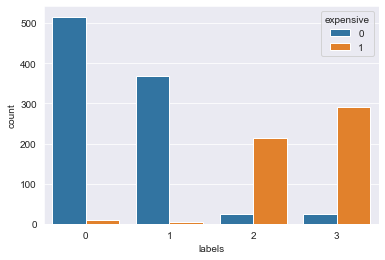

In [42]:
sns.countplot(cluster_data['labels'], hue = cluster_data['expensive'])

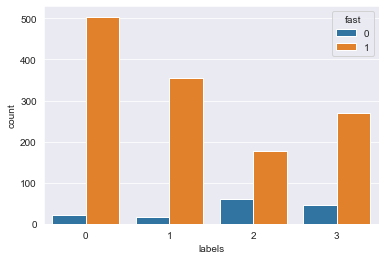

In [43]:
sns.countplot(cluster_data['labels'], hue = cluster_data['fast'])

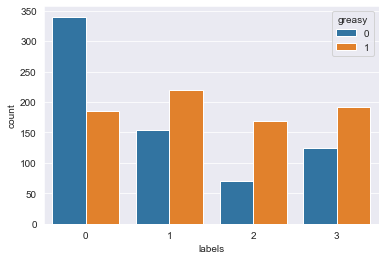

In [44]:
sns.countplot(cluster_data['labels'], hue = cluster_data['greasy'])

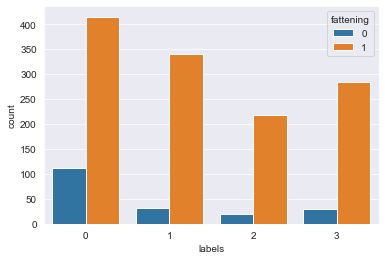

In [45]:
sns.countplot(cluster_data['labels'], hue = cluster_data['fattening'])

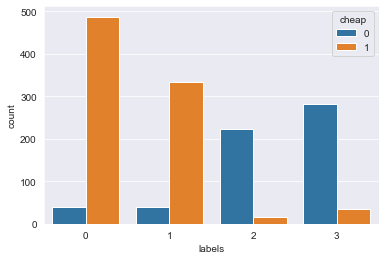

In [46]:
sns.countplot(cluster_data['labels'], hue = cluster_data['cheap'])

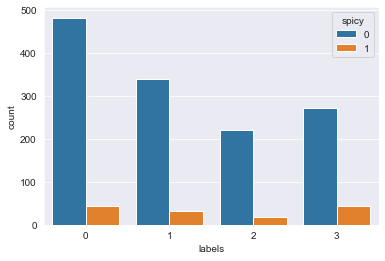

In [47]:
sns.countplot(cluster_data['labels'], hue = cluster_data['spicy'])

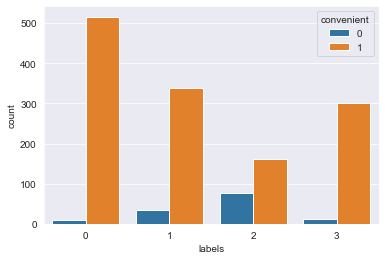

In [48]:
sns.countplot(cluster_data['labels'], hue = cluster_data['convenient'])

segment 0:mostly are people who found convinent,cheap,fast,tasty,yummy

segment 1:mostly are people who found convinent,cheap,fast,not tasty,not healthy, not yummy

segment 2:mostly are people who found expensive,not tasty,not healthy,not yummy

segment 3:mostly are people who found convinent, expensive,tasty, yummy


### Step-7 Describing segments

In [49]:
desc_data = df[df.columns[11:]]

In [50]:
desc_data['labels'] =final_segments.labels_
desc_data.head()

,Like,Age,VisitFrequency,Gender,labels
0,-3,61,Every three months,Female,1
1,+2,51,Every three months,Female,3
2,+1,62,Every three months,Female,3
3,+4,69,Once a week,Female,0
4,+2,49,Once a month,Male,1


#### Figure A.11

In [51]:

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab_like =pd.crosstab(desc_data['labels'],desc_data['Like'])
crosstab_like

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
labels,,,,,,,,,,,
0,49,78,138,109,10,5,0,3,33,2,99
1,49,45,17,4,30,30,36,38,68,56,0
2,13,6,8,0,12,18,30,27,36,89,0
3,41,58,66,47,6,6,7,3,32,5,44


Text(0.5, 1.0, 'recreating figure: A.11')

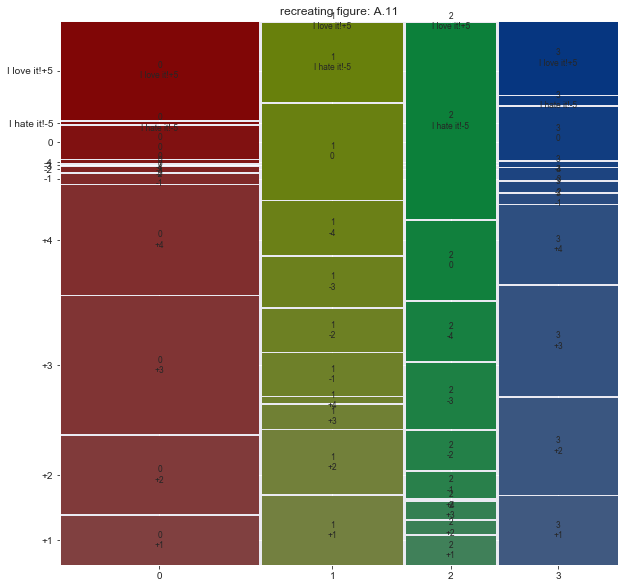

In [52]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab_like.stack())
plt.title('recreating figure: A.11')

#### gender mosaic plot Figure A.12

In [53]:
crosstab_gender =pd.crosstab(desc_data['labels'],desc_data['Gender'])
crosstab_gender

Gender,Female,Male
labels,,
0,321,205
1,218,155
2,100,139
3,149,166


Text(0.5, 1.0, 'recreating figure: A.12')

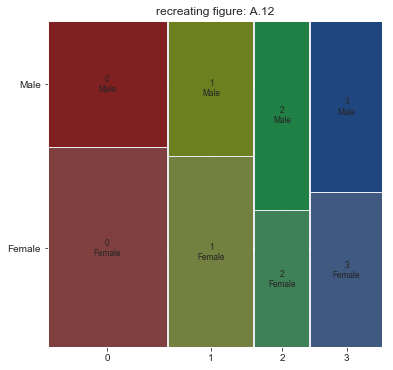

In [54]:
plt.rcParams['figure.figsize'] = (6,6)
mosaic(crosstab_gender.stack())
plt.title('recreating figure: A.12')

#### age vs segments Figure A.13

Text(0.5, 1.0, 'recreating figure A.13')

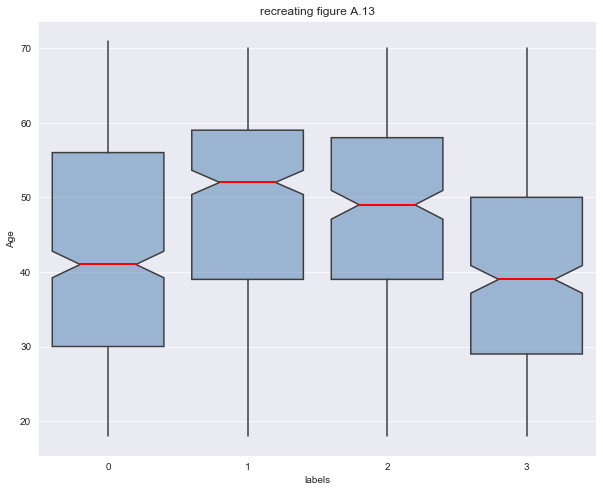

In [55]:
plt.figure(figsize = (10,8))
sns.boxplot(
    data=desc_data, x="labels", y="Age",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)
plt.title('recreating figure A.13')

#### Agebin mosaic plot

In [56]:

crosstab_age =pd.crosstab(desc_data['labels'],desc_data['Age'])
crosstab_age

Age,18,19,20,21,22,23,24,25,26,27,...,62,63,64,65,66,67,68,69,70,71
labels,,,,,,,,,,,,,,,,,,,,,
0,9,2,12,6,10,18,12,15,15,10,...,8,6,12,7,5,12,6,7,4,1
1,2,2,3,3,4,2,6,1,7,4,...,10,12,14,10,8,5,5,4,6,0
2,2,2,1,0,1,0,1,1,2,3,...,12,5,3,4,2,5,1,3,3,0
3,3,4,5,7,8,10,11,9,7,8,...,4,2,3,2,2,4,1,0,2,0


In [57]:
datacopy2=desc_data.copy()
datacopy2['Agebin'] = pd.cut(datacopy2['Age'], bins = [15,25, 35, 50, 60, 70, 75], labels = ['15-25','26-35', '36-50', '51-60', '61-70','71-75'])
crosstab_agebin =pd.crosstab(datacopy2['labels'],datacopy2['Agebin'])
crosstab_agebin

Agebin,15-25,26-35,36-50,51-60,61-70,71-75
labels,,,,,,
0,84,116,136,110,79,1
1,23,47,100,124,79,0
2,8,33,92,62,44,0
3,57,78,102,55,23,0


Text(0.5, 1.0, 'Agebin mosaic plot')

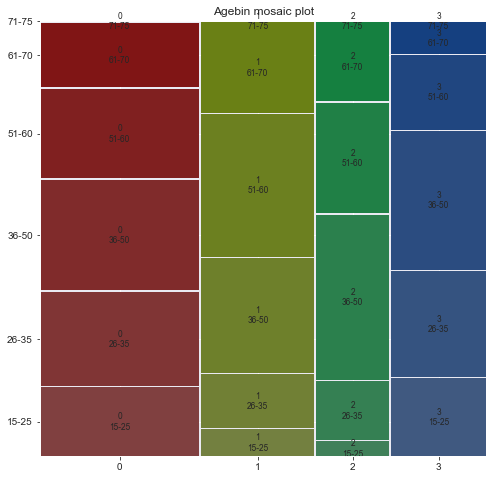

In [58]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(crosstab_agebin.stack())
plt.title('Agebin mosaic plot')

### Frequency mosaic plot

In [59]:
crosstab_freq =pd.crosstab(desc_data['labels'],desc_data['VisitFrequency'])
crosstab_freq

VisitFrequency,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
labels,,,,,,
0,112,32,3,215,130,34
1,99,1,60,71,28,114
2,56,1,64,33,12,73
3,75,20,4,120,65,31


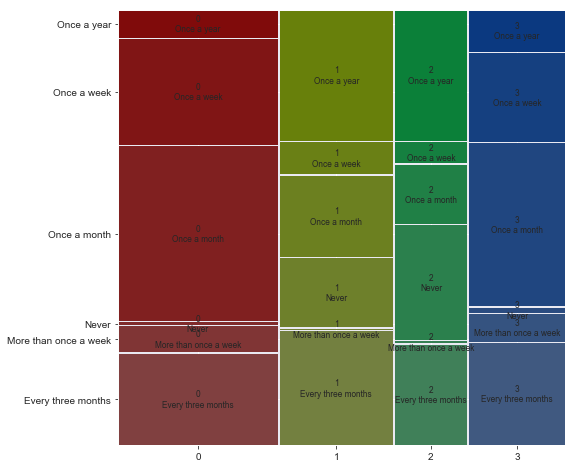

In [60]:
plt.rcParams['figure.figsize'] = (8,8)
mosaic(crosstab_freq.stack())
# plt.tight_layout()
plt.show()